## Практическое задание

#### Используем набор примеров fashion-MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import itertools

import tensorflow as tf

import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [6]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

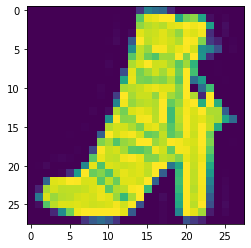

In [7]:
plt.imshow(X_train[11,:,:])
plt.show()

In [8]:
# посмотрим структуру данных
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [9]:
# нормируем данные
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [11]:
# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

#### 1.1.  Опишите - какой результата получен в нейросети в зависимости от:
  - числа нейронов в слое(для 2-хслойной сети)

In [29]:
model_history = []
n_list = [int(i) for i in np.geomspace(5, 200, num=15, axis=0).tolist()]


for n_neurons in tqdm(n_list):

    # define the keras model
    model = Sequential()
    model.add(Dense(n_neurons, input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    #model.summary()

    config = model.get_config()

    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

    # метод для перевода меток класса в OneHot представление
    y_train = to_categorical(y_train_labels)
    y_test = to_categorical(y_test_labels)

    y_train[:5]


    # передача обучающего датасета keras модели
    history = model.fit(X_train, y_train,
                        epochs=5,
                        batch_size=64,
                        verbose=0,
                        validation_data=(X_test, y_test)
                        )
    model_history.append([history, n_neurons])

100%|██████████| 15/15 [01:13<00:00,  4.91s/it]


In [30]:
model_history[0][0].history['accuracy'][-1]

0.7654833197593689

In [31]:
df = pd.DataFrame(columns=['neur_num', 'train accuracy', 'test accuracy'])
i = 0
for i in range(len(model_history)):
    # добавляем кол-во нейронов, и последние метрики (по 5-й эпохе) каждой модели
    df.loc[i] = [model_history[i][1], model_history[i][0].history['accuracy'][-1],\
                 model_history[i][0].history['val_accuracy'][-1]]
    i += 1
df

,neur_num,train accuracy,test accuracy
0,5.0,0.765483,0.7636
1,6.0,0.798700,0.7933
2,8.0,0.820383,0.8094
3,11.0,0.820467,0.8111
4,14.0,0.820450,0.7991
5,18.0,0.827617,0.8189
6,24.0,0.832033,0.8194
7,31.0,0.831183,0.8229
8,41.0,0.835750,0.8253
9,53.0,0.839150,0.8286


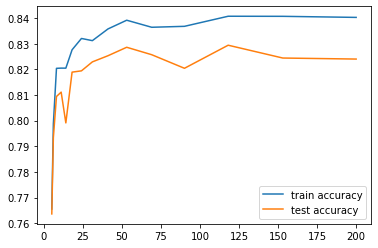

In [32]:
plt.plot(df['neur_num'], df['train accuracy'], label='train accuracy')
plt.plot(df['neur_num'], df['test accuracy'], label='test accuracy')
plt.legend();

##### Вывод:
С увеличением числа нейронов точночть сначала резко возрастает, а затем после примерно 50 нейронов выходит на плато.

#### 1.2. Опишите - какой результата получен в нейросети в зависимости от:
- числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).

##### 2 слоя

In [33]:
model = Sequential()
model.add(Dense(50, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# метод для перевода меток класса в OneHot представление
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

# передача обучающего датасета keras модели
history_2 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [43]:
# создаём пустой датафрейм
df = pd.DataFrame(columns=['layers_num', 'train accuracy', 'test accuracy'])

# добавляем метрики в датафрейм
df.loc[1] = ['2', history_2.history['accuracy'][-1],\
                 history_2.history['val_accuracy'][-1]]

df

,layers_num,train accuracy,test accuracy
1,2,0.835317,0.8212


##### 3 слоя

In [44]:
model = Sequential()
model.add(Dense(50, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# метод для перевода меток класса в OneHot представление
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

# передача обучающего датасета keras модели
history_3 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [45]:
# добавляем метрики в датафрейм
df.loc[3] = ['3', history_3.history['accuracy'][-1],\
                 history_3.history['val_accuracy'][-1]]

df

,layers_num,train accuracy,test accuracy
1,2,0.835317,0.8212
3,3,0.837033,0.8287


In [74]:
df_three_layers = pd.DataFrame(columns=['name', 'train accuracy', 'test accuracy'])

df_three_layers.loc[1]=['3 layers no optimizers', history_3.history['accuracy'][-1],\
                 history_3.history['val_accuracy'][-1]]

##### 5 слоев

In [46]:
model = Sequential()
model.add(Dense(50, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# метод для перевода меток класса в OneHot представление
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

# передача обучающего датасета keras модели
history_5 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [47]:
# добавляем метрики в датафрейм
df.loc[5] = ['5', history_5.history['accuracy'][-1],\
                 history_5.history['val_accuracy'][-1]]

df

,layers_num,train accuracy,test accuracy
1,2,0.835317,0.8212
3,3,0.837033,0.8287
5,5,0.831567,0.8178


##### 10 слоев

In [49]:
model = Sequential()
model.add(Dense(50, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# метод для перевода меток класса в OneHot представление
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

# передача обучающего датасета keras модели
history_10 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [50]:
df.loc[7] = ['10', history_10.history['accuracy'][-1],\
                 history_10.history['val_accuracy'][-1]]

df

,layers_num,train accuracy,test accuracy
1,2,0.835317,0.8212
3,3,0.837033,0.8287
5,5,0.831567,0.8178
7,10,0.787767,0.7868


<AxesSubplot:xlabel='layers_num'>

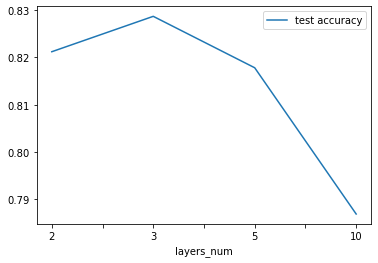

In [55]:
df.plot(x="layers_num", y="test accuracy")

##### Вывод:
С увеличением количества слоев результат на тестовой выборке сначала улучшается, затем после 3 слоев резко падает.

##### 2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [56]:
# параметры оптимизаторов
SGD(learning_rate=0.01, momentum=0.5)
Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)
RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)
Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

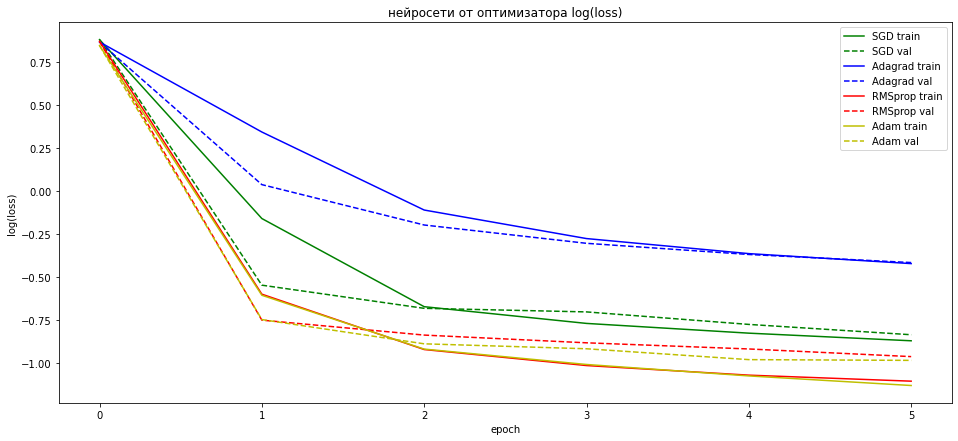

Wall time: 51 s


In [61]:
%%time
# фиксируем сид для создания весов
tf.random.set_seed(1)

# будем сохранять модели в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 5
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([tf.keras.optimizers.SGD(),
                             tf.keras.optimizers.Adagrad(),
                             tf.keras.optimizers.RMSprop(),
                             tf.keras.optimizers.Adam()]):
    
    model_i = Sequential([
        Dense(50, activation='relu', input_shape=(28 * 28,)),
        Dense(18, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=0)

    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [73]:
h.history['val_accuracy']

[0.8281000256538391,
 0.8539000153541565,
 0.8586000204086304,
 0.8658999800682068,
 0.8689000010490417]

In [82]:
h.history['accuracy']

[0.8120999932289124,
 0.8578833341598511,
 0.8682000041007996,
 0.8759499788284302,
 0.8808666467666626]

In [84]:
df_optimiser = pd.DataFrame(columns=['best score name_optimaizer', 'train accuracy', 'test accuracy'])

df_optimiser.loc[1]=['Adam', h.history['accuracy'][-1],\
                 h.history['val_accuracy'][-1]]
df_optimiser

,best score name_optimaizer,train accuracy,test accuracy
1,Adam,0.880867,0.8689


In [75]:
df_three_layers

,name,train accuracy,test accuracy
1,3 layers no optimizers,0.837033,0.8287


##### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

Если сравнить качество нейросети с использованием оптимизаторов и без (для одной и той же модели) то становится очевидным что оптимизаторы в целом показали лучший результат. А найболее эффективным оказался оптимизатор Adam по сравнению с моделью без оптимизатора. 

0.880867 против 0.837033 на тренировочном наборе
и
###### 0.8689 против 0.8287 на тестовой наборе.

Вывод: использование оптимизаторов помогло улучшить качество классификации в нейросети на тестовом наборе.

##### 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [85]:
y_pred = model_i.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [86]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


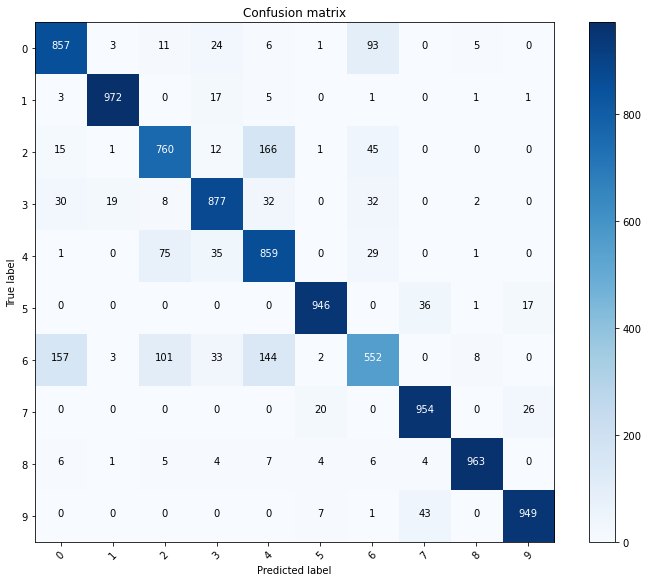

In [89]:
cnf_matrix = confusion_matrix(y_test_labels, y_pred_class)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix', normalize=False)
plt.show()

###### Оценка качества модели по каждому классу отдельно (полнота , точность).

In [90]:
def get_precision_and_recall_from_confusion_matrix(label, cnf_matrix):
    str_sum = 0
    col_sum = 0
    for i in range(len(cnf_matrix)):
        str_sum += cnf_matrix[label][i]
        col_sum += cnf_matrix[i][label]
        
    return cnf_matrix[label][label] / str_sum, cnf_matrix[label][label] / col_sum

In [91]:
pr_rc_result = pd.DataFrame()
precisions = []
recalls = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for l in labels:
    p_r = get_precision_and_recall_from_confusion_matrix(l, cnf_matrix)
    precisions.append(p_r[0])
    recalls.append(p_r[1])
pr_rc_result['label'] = labels
pr_rc_result['precision'] = precisions
pr_rc_result['recall'] = recalls

pr_rc_result.sort_values(by='precision', ascending=False)

,label,precision,recall
1,1,0.972,0.972973
8,8,0.963,0.981651
7,7,0.954,0.919961
9,9,0.949,0.955690
5,5,0.946,0.964322
3,3,0.877,0.875250
4,4,0.859,0.704676
0,0,0.857,0.801684
2,2,0.760,0.791667
6,6,0.552,0.727273


###### Вывод:
Наихудшая точность модели 0,552 а наилучшая 0,972 в сочетании с полнотой не хуже 0,7946 позволяет сделать вывод о том что данная модель является работоспособной.